# Data Handling

Stars: 21594 
Galaxies: 59445 
Quasars: 18961

Null values per feature:
alpha       0
delta       0
u           0
r           0
class       0
redshift    0
plate       0
fiber_ID    0
dtype: int64
------------------------------------CHECKING OUTLIERS-------------------------------------


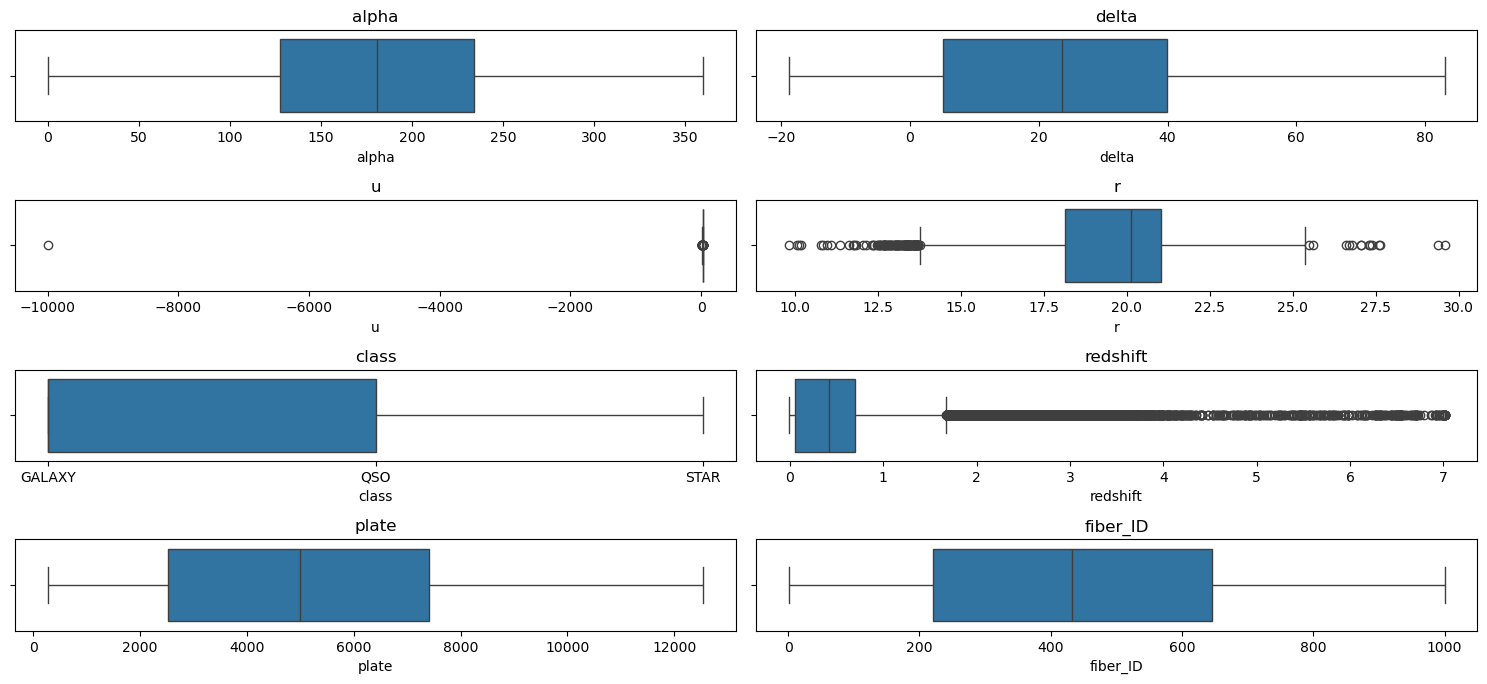

            alpha     delta       u        r class  redshift  plate  fiber_ID
79543  224.006526 -0.624304 -9999.0  18.1656  STAR  0.000089   3314       162
----------------------------------CLEANED DATA BOXPLOT------------------------------------


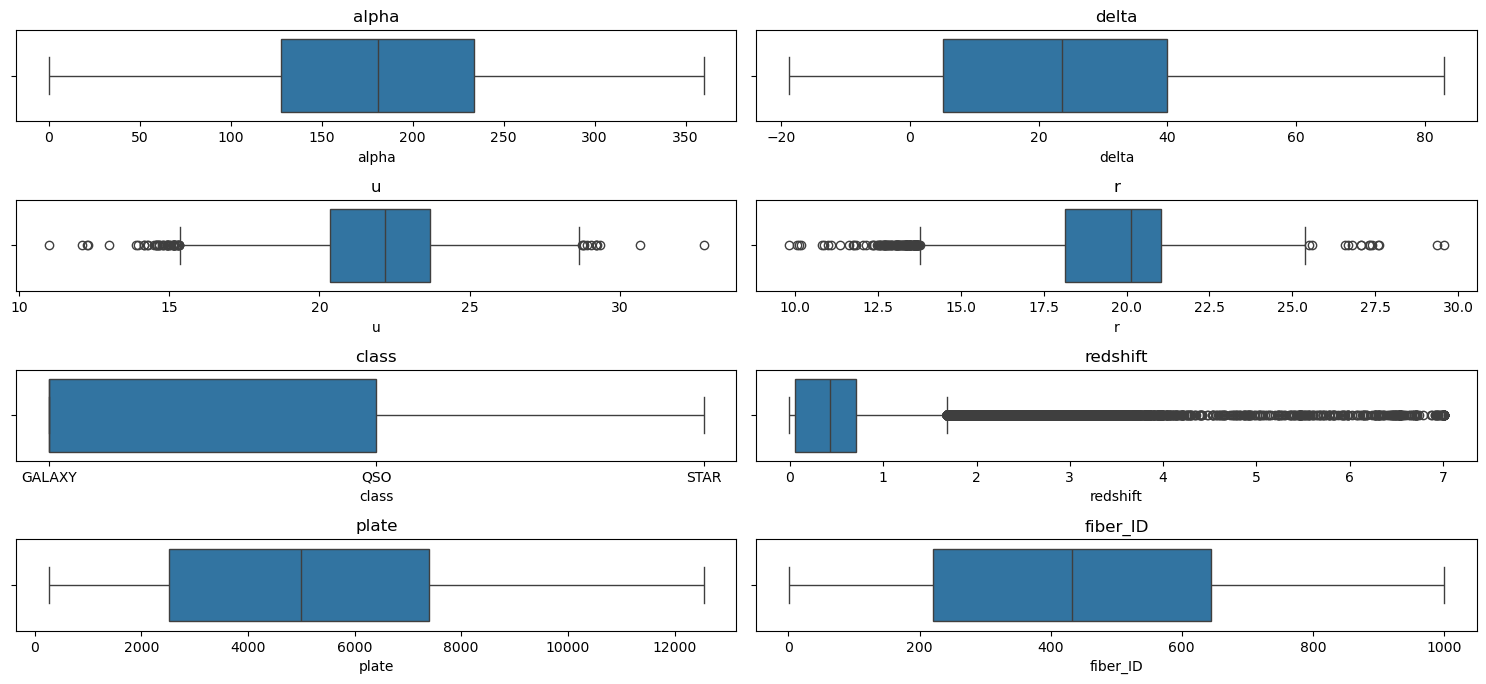

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np


df = pd.read_csv("../Datasets/star_classification.csv")
all_columns = list(df.columns)


#Remove columns that are not useful for classification 
df.drop(columns=["obj_ID"], inplace=True)
df.drop(columns=["rerun_ID"], inplace=True)
df.drop(columns=["spec_obj_ID"], inplace=True)
df.drop(columns=["run_ID"], inplace=True)     #keep
df.drop(columns=["cam_col"], inplace=True)
df.drop(columns=["field_ID"], inplace=True)
#df.drop(columns=["plate"], inplace=True)      #keep
df.drop(columns=["MJD"], inplace=True)         #colinearity MJD-plate
#df.drop(columns=["fiber_ID"], inplace=True)
#df.drop(columns=["u"], inplace=True)
df.drop(columns=["g"], inplace=True)           #colinearity g-z
df.drop(columns=["z"], inplace=True)           #colinearity z-u
df.drop(columns=["i"], inplace=True)           #colinearity i-r
#df.drop(columns=["alpha"], inplace=True)
#df.drop(columns=["delta"], inplace=True)
#df.drop(columns=["redshift"], inplace=True)    #very important
#df.drop(columns=["r"], inplace=True)






columns = list(df.columns)

#CLASS COMPOSITION
n_galaxy = 0
n_star = 0
n_qso = 0

for i in df["class"]:
    if i == "GALAXY":
        n_galaxy += 1
    if i == "STAR":
        n_star += 1
    if i == "QSO":
        n_qso += 1

print(f"Stars: {n_star} \nGalaxies: {n_galaxy} \nQuasars: {n_qso}\n")

#NULL VALUES
print("Null values per feature:")
print(df.isnull().sum())                #Counting missing values pero column
#df.dropna(inplace=True)                #Removes columns with NaN values, inplace=True modifies the actual df
#df.fillna(df.median, inplace=True)     #Fills NaN values with median of the column

#OUTLIERS CHECKING
print("------------------------------------CHECKING OUTLIERS-------------------------------------")
plt.figure(figsize=(15,15))
for i,feature in enumerate(df.columns,1):
    plt.subplot(9,2,i)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.subplots_adjust(wspace=0.3, hspace=1)  # Adjust horizontal and vertical space
plt.tight_layout()
plt.show()

#CHECKING ZCORES FOR COLUMNS WITH OUTLIERS
#I just want to remove outliers from "u" features since the rest could be helpful for classification

threshold = 3.0
z_score = np.abs(zscore(df['u']))
outliers = df[z_score > threshold]
print(outliers)
df = df[(z_score >= 0.0) & (z_score <= 3.0)]

#BOXPLOT OF CLEANED DATA
print("----------------------------------CLEANED DATA BOXPLOT------------------------------------")
plt.figure(figsize=(15,15))
for i,feature in enumerate(df.columns,1):
    plt.subplot(9,2,i)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.subplots_adjust(wspace=0.3, hspace=1)  # Adjust horizontal and vertical space
plt.tight_layout()
plt.show()

#SPLIT DATA FROM LABEL FOR FURTHER TRANSFORMATIONS

data = df.drop(columns="class")
label = df["class"]

#NORMALIZATION (MINMAX SCALING OR STANDARD SCALING)
from sklearn.preprocessing import MinMaxScaler, StandardScaler      #MinMax better for NN

scaler_MM = MinMaxScaler()
scaler_Std = StandardScaler()

#normalization of datset with MinMax scaling
data_MM = pd.DataFrame(scaler_MM.fit_transform(data),columns=columns[1:]) 

#normalization of dataset with Standard scaling to future use in deep learning
data_Std = pd.DataFrame(scaler_Std.fit_transform(data),columns=columns[1:])

In [10]:
#CORRELATION ANALYSIS BY PAIRPLOTTING

#sns.pairplot(df_S, hue="class", palette="coolwarm")
#plt.show()

In [11]:
#COEFFICIENTS OF REGRESSIONS FOR ALL THE CLASSES
import statsmodels.api as sm

# Function to calculate R-squared
def calculate_r2(x, y):
    # Adding constant for intercept in regression model
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()  # Fit the Ordinary Least Squares regression
    return model.rsquared  # Return R-squared

for i in columns:
    if i == "class":
        continue
    for j in columns:
        if j == "class":
            continue
        x = df[i]
        y = df[j]
        r2 = calculate_r2(x,y)
        print(f"R2({i},{j}) = {r2}")

#COEFFICIENTS OF REGRESSIONS FOR SPECIFIC CLASSES???????


R2(alpha,alpha) = 1.0
R2(alpha,delta) = 0.01923722686159568
R2(alpha,u) = 4.939052389296705e-08
R2(alpha,r) = 0.00048749134723380383
R2(alpha,redshift) = 2.7920242252621463e-06
R2(alpha,plate) = 6.508364442936454e-06
R2(alpha,fiber_ID) = 0.0009283626057254857
R2(delta,alpha) = 0.019237226861581247
R2(delta,delta) = 1.0
R2(delta,u) = 0.0007206515889293108
R2(delta,r) = 4.685065139653499e-05
R2(delta,redshift) = 0.0010003820910867711
R2(delta,plate) = 0.01261626569739549
R2(delta,fiber_ID) = 0.0007973249979453811
R2(u,alpha) = 4.939052522523468e-08
R2(u,delta) = 0.0007206515889311982
R2(u,u) = 1.0
R2(u,r) = 0.5309766228683088
R2(u,redshift) = 0.027827593255426497
R2(u,plate) = 0.15670049733329305
R2(u,fiber_ID) = 0.03355255753815567
R2(r,alpha) = 0.0004874913472372455
R2(r,delta) = 4.685065141285527e-05
R2(r,u) = 0.5309766228683042
R2(r,r) = 1.0
R2(r,redshift) = 0.18769444233927346
R2(r,plate) = 0.4293417677093524
R2(r,fiber_ID) = 0.04977338705256862
R2(redshift,alpha) = 2.79202422515112

In [12]:
#CHECKING COLINEARITIES AND REDUNDANCES
#print(df["rerun_ID"].unique())      #only one value for rerun_ID feature --> remove
#df.drop(columns=["rerun_ID"], inplace=True)
#df.drop(columns=["spec_obj_ID"], inplace=True)    #colinearity with plate and MJD


In [13]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label_encoded = encoder.fit_transform(label)

X_train, X_test, y_train, y_test = train_test_split(data_Std, label_encoded, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(79999, 7) (79999,)
(20000, 7) (20000,)


## Logistic regression model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


log_reg = LogisticRegression(max_iter=300, random_state=42, solver="newton-cg")
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_mat =  confusion_matrix(y_test,y_pred)

for i in range(len(label.unique())):
    print(f" {np.unique(label_encoded)[i]} = {label.unique()[i]}")

print(classification_report(y_test, y_pred))

print(f"ACCURACY = {accuracy *100}%\n")
print("------- Confusion Matrix --------")
print(conf_mat)




 0 = GALAXY
 1 = QSO
 2 = STAR
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11904
           1       0.94      0.85      0.90      3810
           2       0.95      1.00      0.97      4286

    accuracy                           0.95     20000
   macro avg       0.95      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000

ACCURACY = 95.07%

------- Confusion Matrix --------
[[11474   198   232]
 [  554  3255     1]
 [    0     1  4285]]


## kNN model

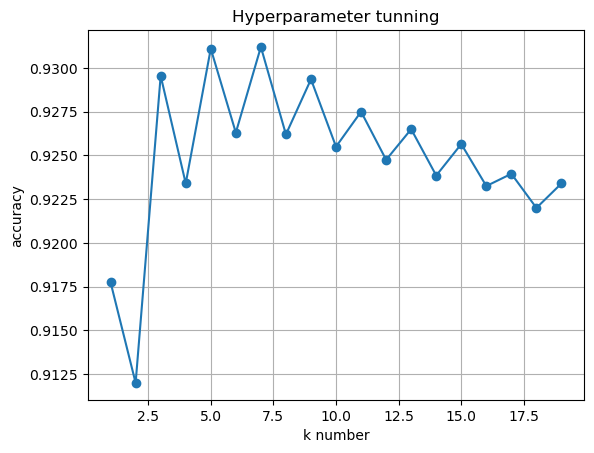

In [15]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
k_list = range(1,20)

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_list, accuracies, marker="o")
plt.xlabel("k number")
plt.ylabel("accuracy")
plt.title("Hyperparameter tunning")
plt.grid(True)
plt.show()





In [17]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm="ball_tree")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat =  confusion_matrix(y_test,y_pred)

for i in range(len(label.unique())):
    print(f" {np.unique(label_encoded)[i]} = {label.unique()[i]}")

print(classification_report(y_test, y_pred))

print(f"ACCURACY = {accuracy *100}%\n")
print("------- Confusion Matrix --------")
print(conf_mat)

 0 = GALAXY
 1 = QSO
 2 = STAR
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11904
           1       0.97      0.87      0.92      3810
           2       0.92      0.89      0.90      4286

    accuracy                           0.93     20000
   macro avg       0.94      0.91      0.92     20000
weighted avg       0.93      0.93      0.93     20000

ACCURACY = 93.12%

------- Confusion Matrix --------
[[11487   112   305]
 [  434  3333    43]
 [  481     1  3804]]
